## Problem Statement
The Titanic shipwreck remains one of the worst maritime disasters in history, with over 1500 passengers losing their lives. Despite efforts to improve maritime safety, disasters continue to occur. Developing a model that can accurately predict which passengers are likely to survive such a disaster has the potential to save lives. The goal of this project is to use machine learning techniques to create a model that can predict which passengers are likely to survive a shipwreck like the Titanic. This model will be based on a dataset containing information about the passengers on the Titanic, including Age, ticket information, and survival outcomes. The objective is to build a model that can accurately predict the survival chances of a passenger based on this data, and to determine the most important factors that contribute to survival.

## Data
You can download the data here:https://www.kaggle.com/competitions/titanic/data

The data has been split into two groups:

* training set (train.csv)
* test set (test.csv)

The training set should be used to build our machine learning models. For the training set, we are provided with the outcome (also known as the “ground truth”) for each passenger. Our model will be based on “features” like passengers’ gender and class. But we get to perform some  feature engineering to create new features.

The test set should be used to see how well our model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is our job to predict these outcomes. For each passenger in the test set, we use the model we have  trained to predict whether or not they survived the sinking of the Titanic.

Variable Features:

* pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower
* age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
* sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)
* parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

## Importing libraries

In [5]:
#data
import pandas as pd
import numpy as np

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

## Loading the data

In [6]:
train_df = pd.read_csv("/content/drive/MyDrive/Titanic/train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Titanic/test.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## column explanation
* survived = 0 - d , 1 - alive

* pclass = Ticket class
* sibsp = Wife, uncle, etc. on Titanic. If it's zero, you'll be alone.
* parch = parent + childer
* embarked  = port of Embarktion

In [8]:
print(train_df.shape)
print(test_df.shape)

(891, 12)
(418, 11)


In [9]:
print("train= ",train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
train=  None


In [10]:
print("test= ",test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
test=  None


## Visualization

Let us start by checking the missing values in our dataset

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Text(0.5, 1.0, 'Train set')

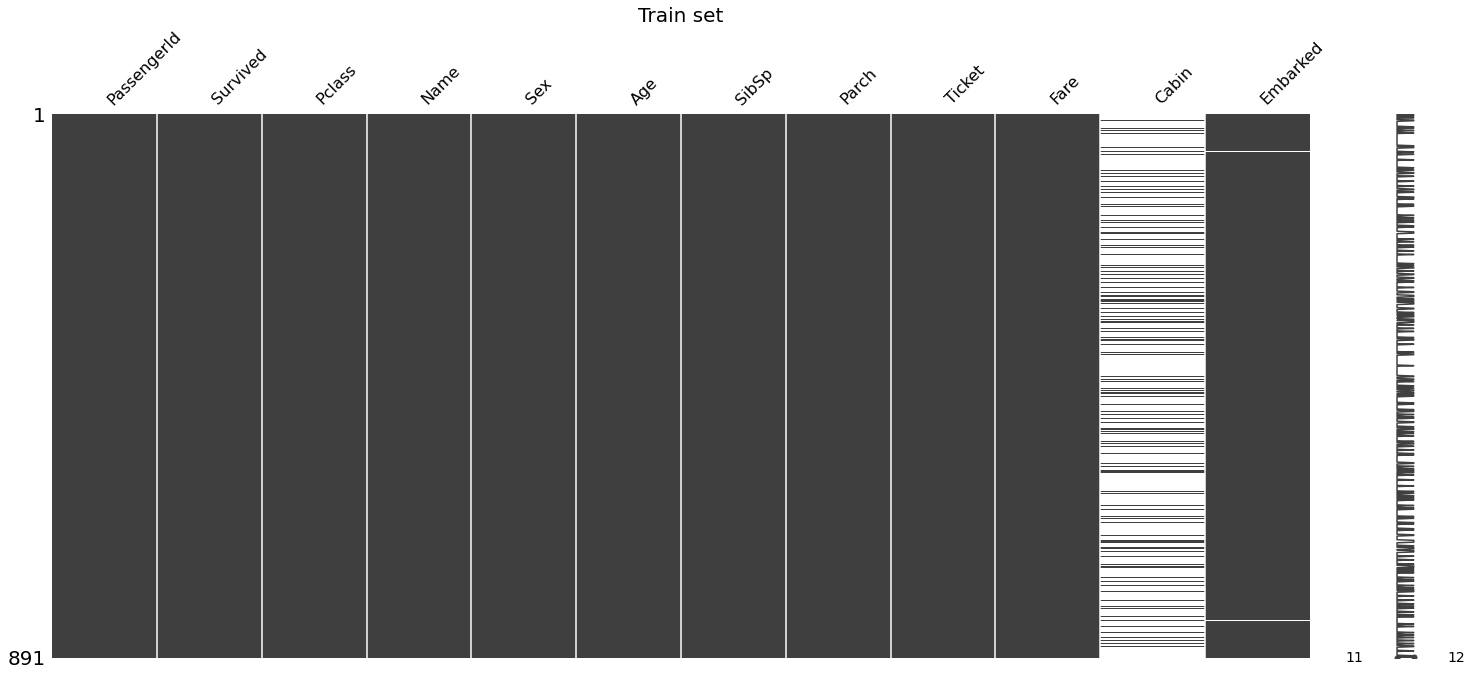

In [20]:
print(train_df.isnull().sum())
msno.matrix(train_df).set_title("Train set",fontsize=20)

In [15]:
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)


PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Text(0.5, 1.0, 'Train set')

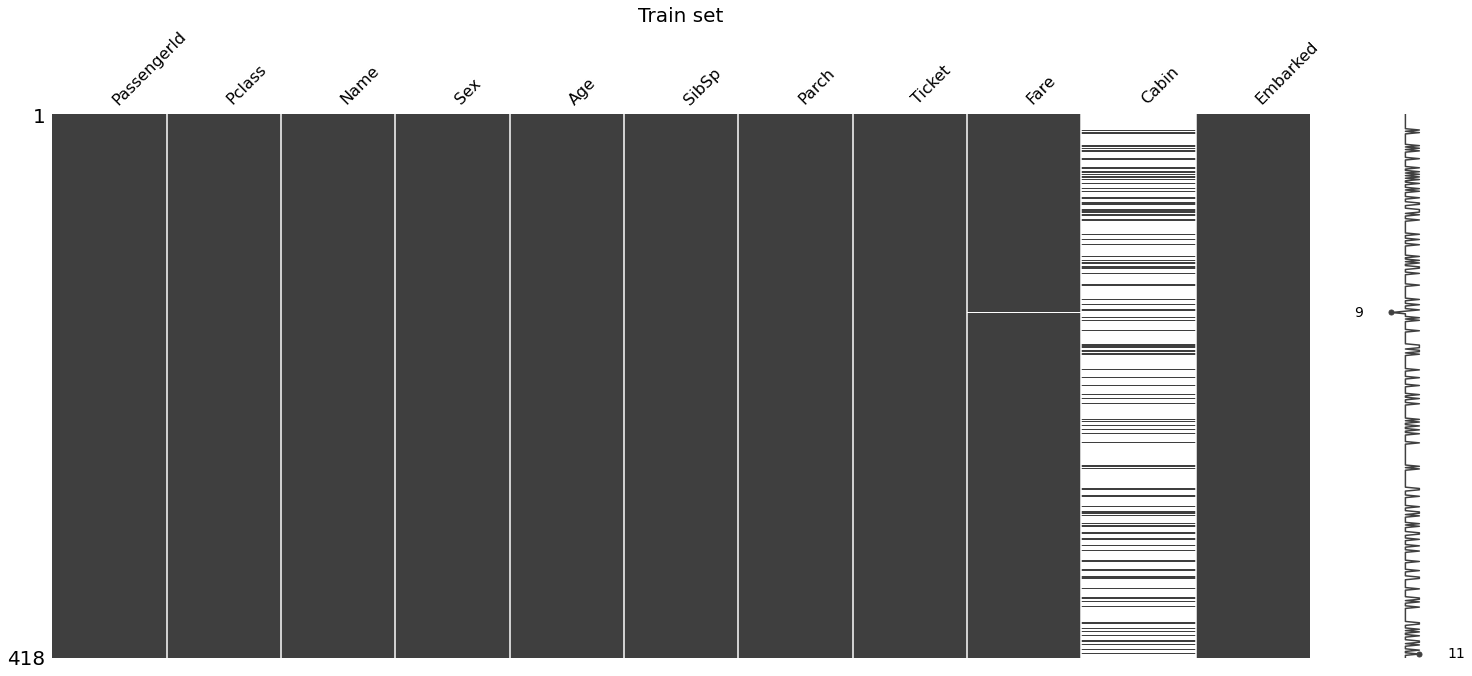

In [22]:
print(test_df.isnull().sum())
msno.matrix(test_df).set_title("Train set",fontsize=20)

In [16]:
test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)


##  Make Graph - Which is show "feature"- Dead.

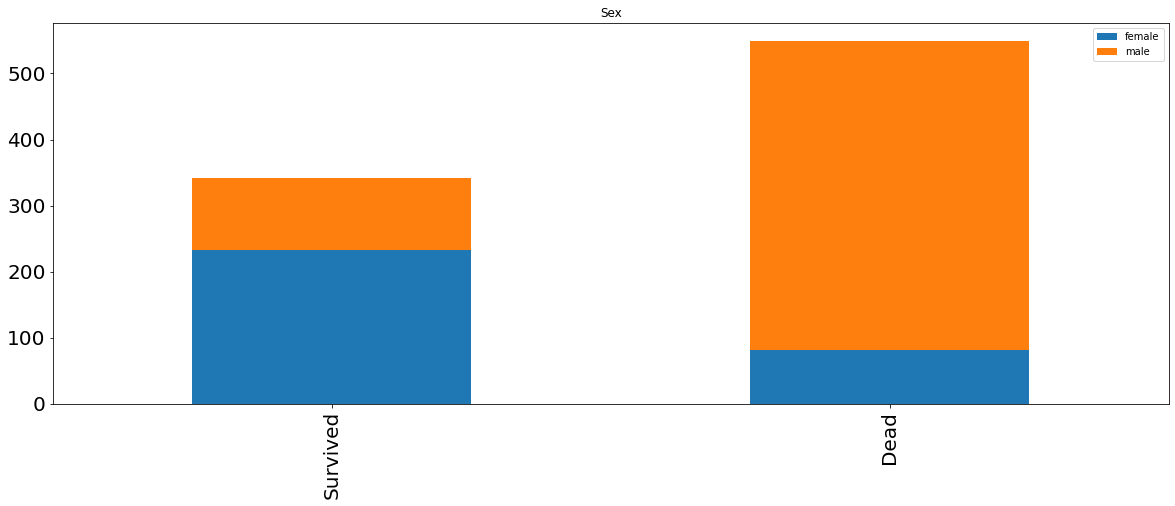

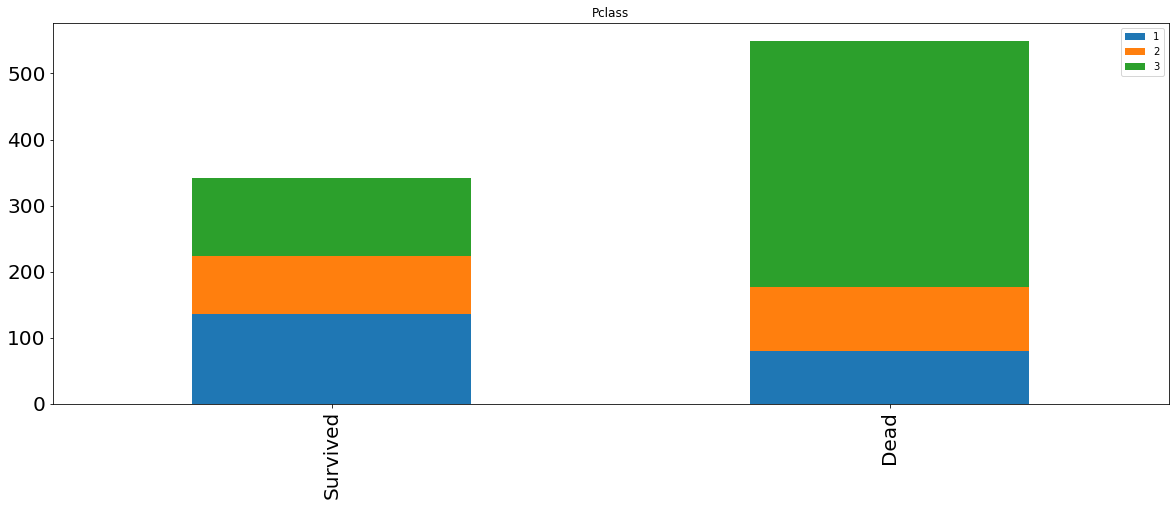

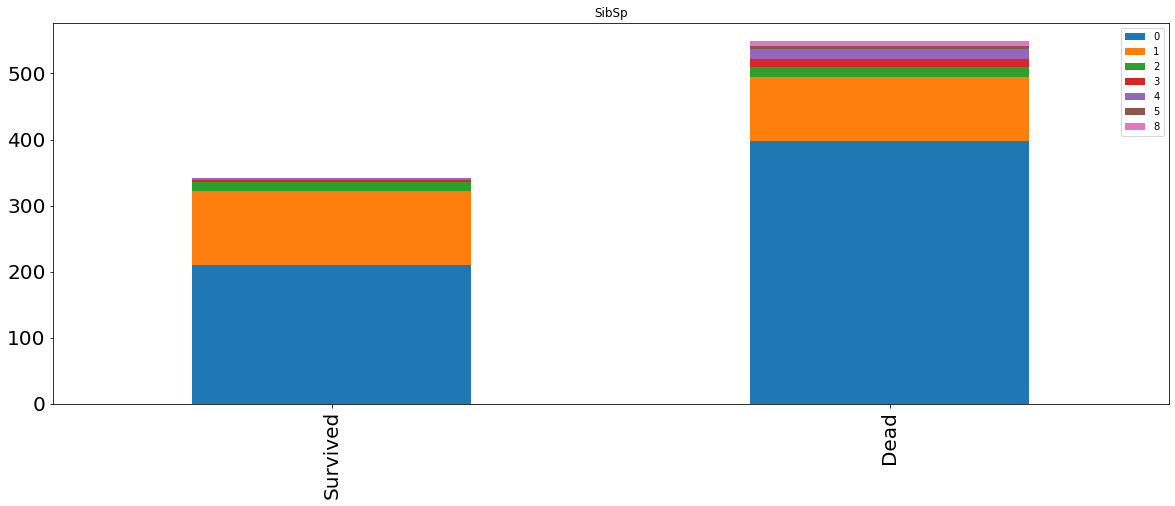

In [23]:
def bar_chart(feature):
    survived = train_df[train_df["Survived"]==1][feature].value_counts()
    dead = train_df[train_df["Survived"]==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ["Survived","Dead"]
    df.plot(kind="bar",stacked=True, figsize=(20,7),title=feature,fontsize=20)
for a in ["Sex","Pclass","SibSp"]:
    bar_chart(a)


* we can see that more female survived as compared to Male in our Sex graph.
* In terms of ticket class,class 3 died more as compared to those that survived
in terms of Sibsp more 0 are dead as compared to those that survived 


##  Feature Engineering

## Name
The name doesn't reflect much on the result, but Mr. and Mrs in the name imply information about whether or not they are married, so  we only extract it

In [24]:
train_df.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


Remove names other than Mr or Mrs etc

In [25]:
train_test_df = [train_df,test_df]

for dataset in train_test_df:
    dataset["Title"] = dataset["Name"].str.extract('([A-Za-z]+)\.',expand=False)

In [26]:
train_df["Title"]

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object

In [27]:
train_df["Title"].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

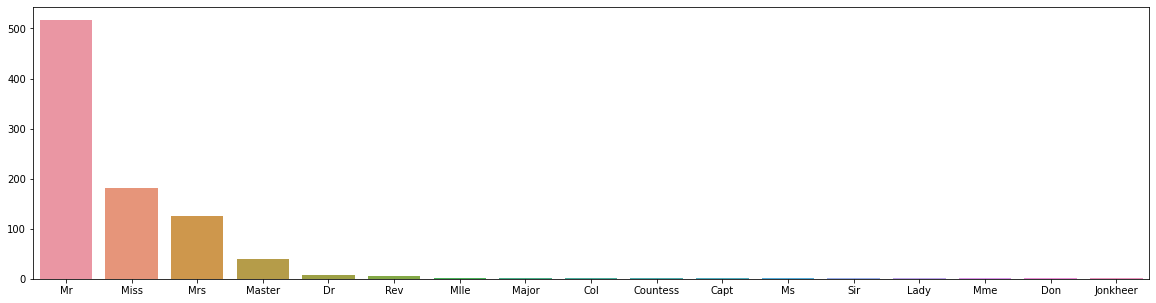

In [29]:
title = train_df["Title"].value_counts()
plt.figure(figsize =(20,5))
sns.barplot(x = title.index, y = title.values);

Mr. title has the most number in our data poulation followed by Miss,Mrs,Master etc

In [30]:
# using another library to more various visualization
import plotly.express as px
px.bar(x = title.index, y = title.values)

In [31]:
title_mapping = {
    'Mr': 0, "Miss":1,"Mrs":2,"Master":3,"Dr":3,"Rev":3,"Col":3,"Major":3,"Mile":3,"Countess":3,"Ms":3,"Lady":3,"Johnkheer":3,"Don":3,"Dona":3,"Mme":3,"Capt":3,"Sir":3
}

for dataset in train_test_df:
    dataset["Title"] = dataset["Title"].map(title_mapping)

In [32]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0


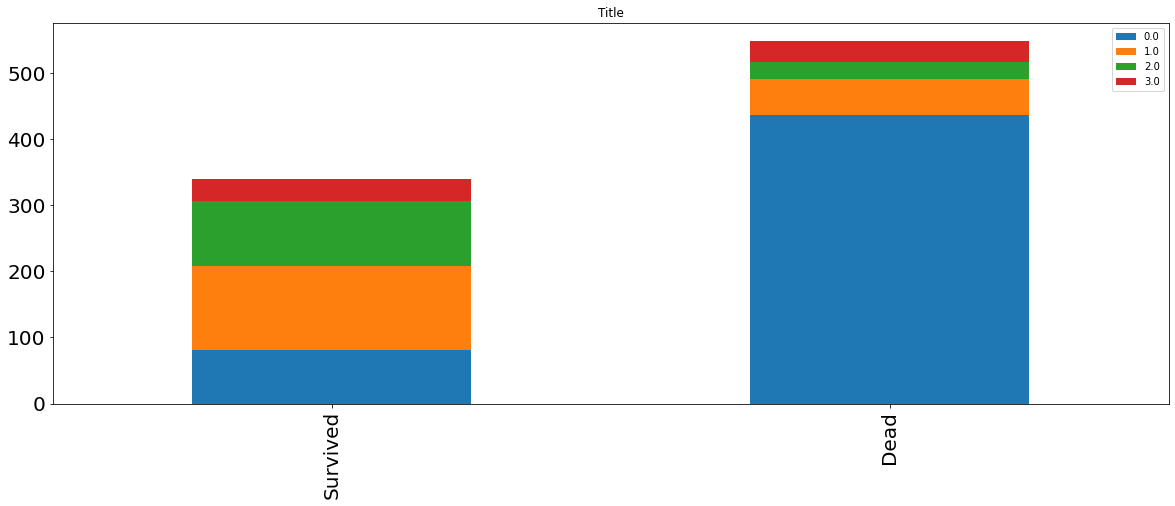

In [33]:
bar_chart("Title")

In [34]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,3.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,1.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,0.0


## Sex

In [35]:
sex_mapping = {"male":0,"female":1}
for dataset in train_test_df:
    dataset["Sex"] = dataset["Sex"].map(sex_mapping)

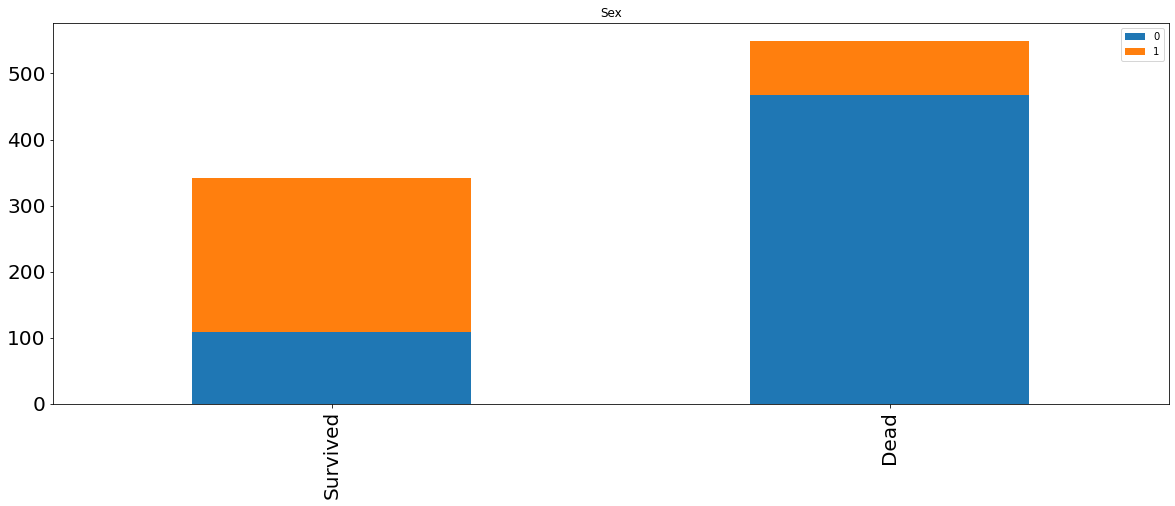

In [36]:
bar_chart("Sex")

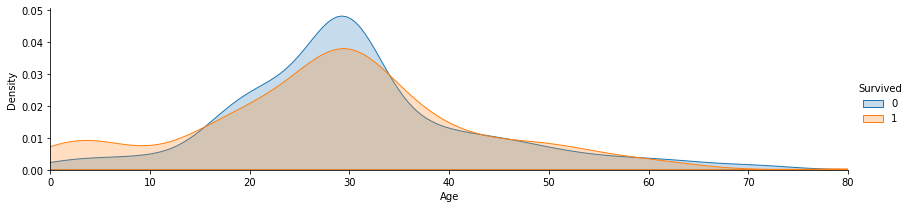

In [37]:
# visualization death - age
facet = sns.FacetGrid(train_df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Age",shade=True)
facet.set(xlim=(0,train_df['Age'].max()))
facet.add_legend()

plt.show()

Both the most dead age group and the most surviving age group are in their 20s and mid-30s. People in their 0s to 10s and late 30s can see that there are more dead people

(0.0, 20.0)

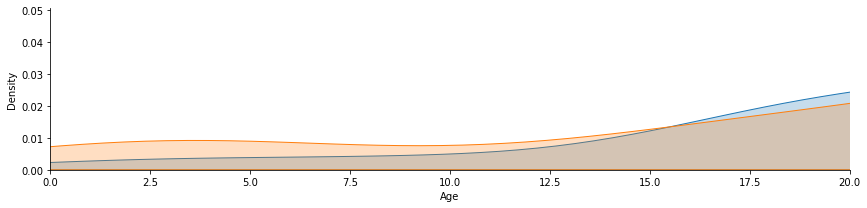

In [38]:
# visualization death - age, age between 0~20 years old
facet = sns.FacetGrid(train_df, hue="Survived", aspect=4)
facet.map(sns.kdeplot,"Age",shade=True)
facet.set(xlim=(0,train_df["Age"].max())) # to use xlim, limitation age's range
plt.xlim(0,20) # to limitation X boundary, we can see the graph more specifically

(20.0, 30.0)

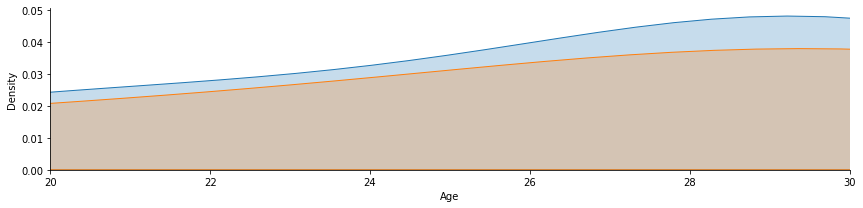

In [39]:
# visualization death - age, age between 20~30 years old
facet = sns.FacetGrid(train_df, hue="Survived", aspect=4)
facet.map(sns.kdeplot,"Age",shade=True)
facet.set(xlim=(0,train_df["Age"].max())) # to use xlim, limitation age's range
plt.xlim(20,30)

Binning:

Binning is a process in feature engineering where continuous or numerical variables are divided into a set of "bins" or intervals with a specific range. This is done to convert numerical variables into categorical ones, which can be useful for simplifying and reducing the complexity of models, as well as reducing the noise in the data. The binned variable is then treated as a categorical feature, and different statistical techniques can be applied to it.


In [40]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,NaN,S,3.0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,B42,S,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,NaN,S,1.0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,C148,C,0.0


In [41]:
df_2 = train_df["Age"]
df_2 = pd.DataFrame(df_2)
df_2.columns=["Age"]
for i in range(891):
    a = df_2['Age'].get(i)
    if int(a) <= 16:
        df_2['Age'][i] = 0
    elif int(a) > 16 and a <=26:
        df_2['Age'][i] = 1
    elif int(a) > 26 and a <= 36:
        df_2['Age'][i] = 2
    elif int(a) >36 and a <= 64:
        df_2["Age"][i] = 3
    else:
        df_2['Age'][i] = 4
        
train_df["Age"] = df_2["Age"]
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,2.0,0,0,211536,13.0000,NaN,S,3.0
887,888,1,1,"Graham, Miss. Margaret Edith",1,1.0,0,0,112053,30.0000,B42,S,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,2.0,1,2,W./C. 6607,23.4500,NaN,S,1.0
889,890,1,1,"Behr, Mr. Karl Howell",0,1.0,0,0,111369,30.0000,C148,C,0.0


I devided "age" into 5 part.

* 0-16 years old - 1

* 16-26 years old - 2

* 26-36 years old - 3

* 36-64 years old - 4

* 64- years old - 5

In [42]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",0,34.50000,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.00000,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",0,62.00000,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",0,27.00000,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.00000,1,1,3101298,12.2875,NaN,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,30.27259,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.00000,0,0,PC 17758,108.9000,C105,C,3
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",0,30.27259,0,0,359309,8.0500,NaN,S,0


In [43]:
df_2 = test_df["Age"]
df_2 = pd.DataFrame(df_2)
df_2.columns=["Age"]
for i in range(418):
    a = df_2['Age'].get(i)
    if int(a) <= 16:
        df_2['Age'][i] = 0
    elif int(a) > 16 and a <=26:
        df_2['Age'][i] = 1
    elif int(a) > 26 and a <= 36:
        df_2['Age'][i] = 2
    elif int(a) >36 and a < 64:
        df_2["Age"][i] = 3
    else:
        df_2['Age'][i] = 4
test_df["Age"] = df_2["Age"]
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",0,2.0,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,3.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",0,3.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",0,2.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1.0,1,1,3101298,12.2875,NaN,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,2.0,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,3.0,0,0,PC 17758,108.9000,C105,C,3
415,1307,3,"Saether, Mr. Simon Sivertsen",0,3.0,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",0,2.0,0,0,359309,8.0500,NaN,S,0


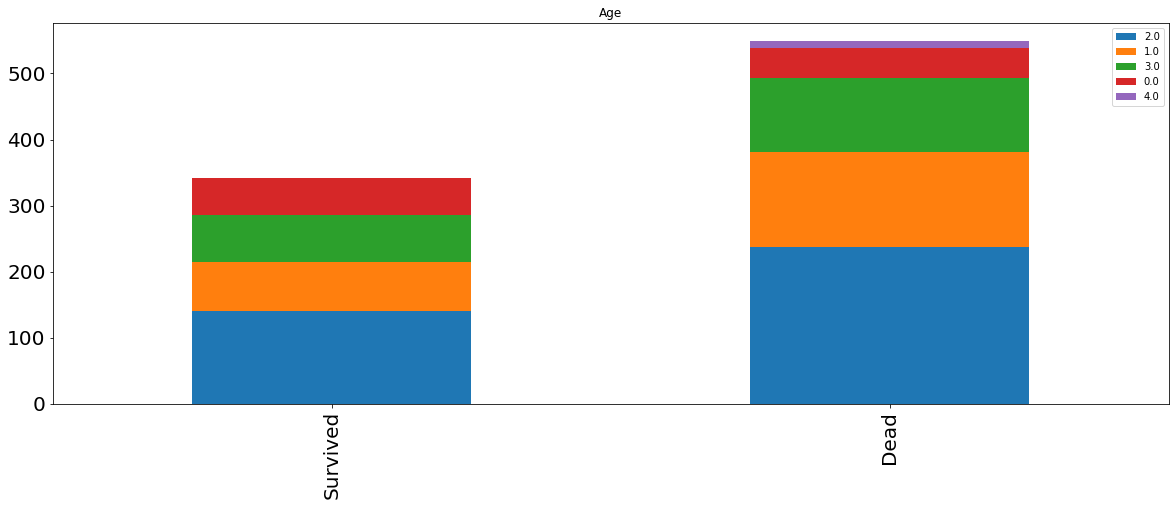

In [44]:
bar_chart("Age")

Through the Bar graph, we can see that the age group of 26 to 36 years old is  the highest among the dead.

## Embarked

In [45]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,2.0,0,0,211536,13.0000,NaN,S,3.0
887,888,1,1,"Graham, Miss. Margaret Edith",1,1.0,0,0,112053,30.0000,B42,S,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,2.0,1,2,W./C. 6607,23.4500,NaN,S,1.0
889,890,1,1,"Behr, Mr. Karl Howell",0,1.0,0,0,111369,30.0000,C148,C,0.0


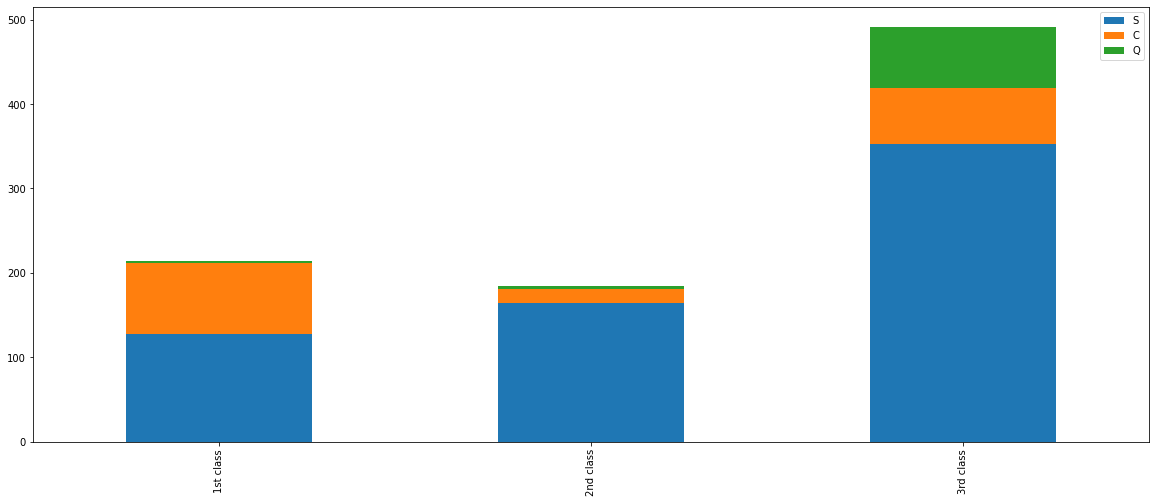

In [47]:
pclass1 = train_df[train_df["Pclass"]==1]["Embarked"].value_counts() # the place where a first-class person got off
pclass2 = train_df[train_df["Pclass"]==2]["Embarked"].value_counts() # the place where a second-class person got off
pclass3 = train_df[train_df["Pclass"]==3]["Embarked"].value_counts() # the place where a third-class person got off
df = pd.DataFrame([pclass1,pclass2,pclass3])
df.index = ["1st class","2nd class","3rd class"]
df.plot(kind="bar",stacked = True, figsize=(20,8));

In [48]:
for dataset in train_test_df:
    dataset["Embarked"] = dataset['Embarked'].fillna("S")
# fill "S" in blanked "Embarked" row
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,S,0.0


In [49]:
embarked_mapping = {"S":0,"C":1,"Q":2} # do mapping(test - number) in embarked row, for more convinence in machine learning
for dataset in train_test_df:
    dataset["Embarked"] = dataset["Embarked"].map(embarked_mapping)

##  Fare

In [50]:
train_df["Fare"].fillna(train_df.groupby("Pclass")["Fare"].transform("median"),inplace=True)
test_df["Fare"].fillna(test_df.groupby("Pclass")["Fare"].transform("median"),inplace=True)

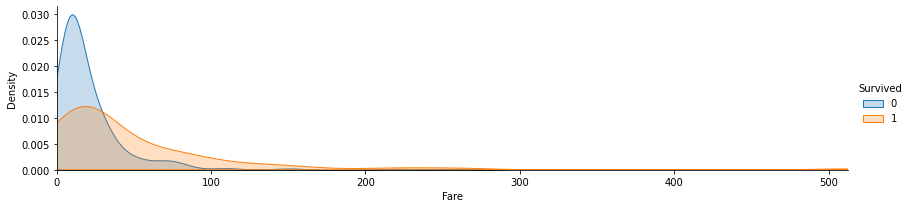

In [52]:
facet = sns.FacetGrid(train_df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Fare",shade=True)
facet.set(xlim=(0,train_df["Fare"].max()))
facet.add_legend();

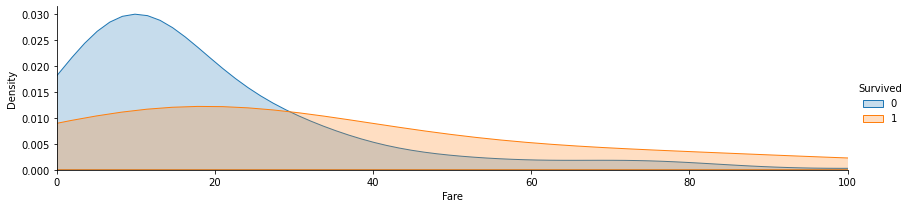

In [53]:
facet = sns.FacetGrid(train_df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Fare",shade=True)
facet.set(xlim=(0,100))
facet.add_legend();

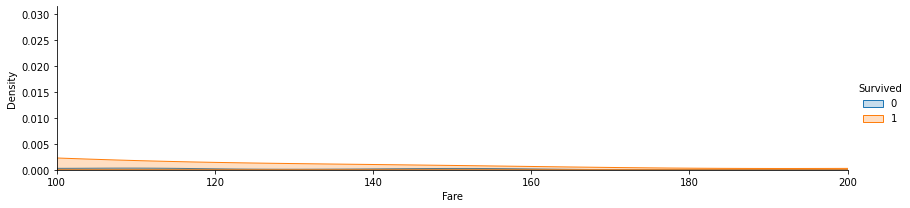

In [54]:
facet = sns.FacetGrid(train_df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Fare",shade=True)
facet.set(xlim=(100,200))
facet.add_legend();

In [55]:
df_2 = train_df["Fare"]
df_2 = pd.DataFrame(df_2)
df_2.columns=["Fare"]
for i in range(891):
    a = df_2['Fare'].get(i)
    if int(a) <= 8:
        df_2['Fare'][i] = 0
    elif int(a) > 8 and a <=17:
        df_2['Fare'][i] = 1
    elif int(a) > 17 and a <= 27:
        df_2['Fare'][i] = 2
    elif int(a) >27 and a < 37:
        df_2["Fare"][i] = 3
    else:
        df_2['Fare'][i] = 4
train_df["Fare"] = df_2["Fare"]
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,0.0,NaN,0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,4.0,C85,1,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,4.0,C123,0,2.0
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,0.0,NaN,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,2.0,0,0,211536,1.0,NaN,0,3.0
887,888,1,1,"Graham, Miss. Margaret Edith",1,1.0,0,0,112053,3.0,B42,0,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,2.0,1,2,W./C. 6607,2.0,NaN,0,1.0
889,890,1,1,"Behr, Mr. Karl Howell",0,1.0,0,0,111369,3.0,C148,1,0.0


In [56]:
df_2 = test_df["Fare"]
df_2 = pd.DataFrame(df_2)
df_2.columns=["Fare"]
for i in range(418):
    a = df_2['Fare'].get(i)
    if int(a) <= 8:
        df_2['Fare'][i] = 0
    elif int(a) > 8 and a <=17:
        df_2['Fare'][i] = 1
    elif int(a) > 17 and a <= 27:
        df_2['Fare'][i] = 2
    elif int(a) >27 and a < 37:
        df_2["Fare"][i] = 3
    else:
        df_2['Fare'][i] = 4
test_df["Fare"] = df_2["Fare"]
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",0,2.0,0,0,330911,0.0,NaN,2,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,3.0,1,0,363272,0.0,NaN,0,2
2,894,2,"Myles, Mr. Thomas Francis",0,3.0,0,0,240276,1.0,NaN,2,0
3,895,3,"Wirz, Mr. Albert",0,2.0,0,0,315154,0.0,NaN,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1.0,1,1,3101298,1.0,NaN,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,2.0,0,0,A.5. 3236,0.0,NaN,0,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,3.0,0,0,PC 17758,4.0,C105,1,3
415,1307,3,"Saether, Mr. Simon Sivertsen",0,3.0,0,0,SOTON/O.Q. 3101262,0.0,NaN,0,0
416,1308,3,"Ware, Mr. Frederick",0,2.0,0,0,359309,0.0,NaN,0,0


## Cabin

C    59
B    47
D    29
E    25
A    15
T     1
Name: Cabin, dtype: int64


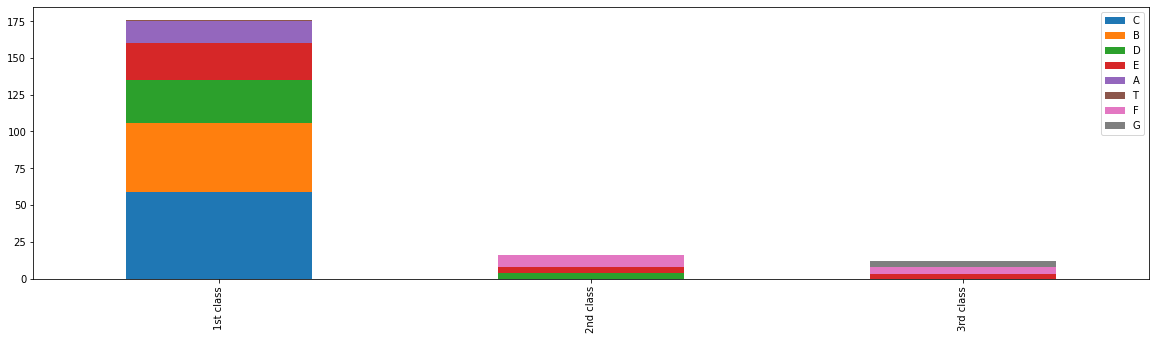

In [58]:
for dataset in train_test_df:
    dataset["Cabin"] = dataset["Cabin"].str[:1]

pclass1 = train_df[train_df["Pclass"]==1]["Cabin"].value_counts() #1Number of rooms for graded people
pclass2 = train_df[train_df["Pclass"]==2]["Cabin"].value_counts() #2Number of rooms for graded people
pclass3 = train_df[train_df["Pclass"]==3]["Cabin"].value_counts() #3Number of rooms for graded people
print(pclass1)

df = pd.DataFrame([pclass1,pclass2,pclass3])
df.index = ["1st class","2nd class","3rd class"]
df.plot(kind="bar",stacked = True, figsize=(20,5));

In [59]:
cabin_mapping = {"A":0,"B":0.4,"C":0.8,"D":1.2,"E":1.6,"F":2,"G":2.4,"T":2.8} # do mapping, 
# If the range of numbers is not similar, the larger range can be considered more important.
# So I'm going to divide it up to a decimal place and give it a similar range.
# it called feature scaling.
for dataset in train_test_df:
    dataset["Cabin"] = dataset["Cabin"].map(cabin_mapping)

In [60]:
train_df["Cabin"].fillna(train_df.groupby("Pclass")["Cabin"].transform("median"),inplace=True)
test_df["Cabin"].fillna(test_df.groupby("Pclass")["Cabin"].transform("median"),inplace=True)

## Family Size

In [61]:
train_df["FamilySize"] = train_df["SibSp"] + train_df["Parch"] + 1
test_df["FamilySize"] = test_df['SibSp'] + test_df["Parch"] + 1

(-3.0, 11.0)

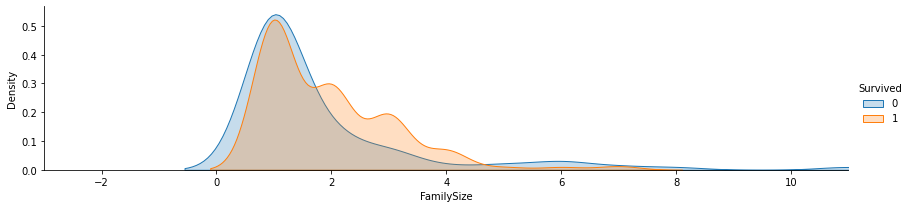

In [62]:
facet = sns.FacetGrid(train_df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"FamilySize",shade=True)
facet.set(xlim=(0,train_df["FamilySize"].max()))
facet.add_legend()
plt.xlim(-3)

In [63]:
family_mapping = {1:0,2:0.4,3:0.8,4:1.2,5:1.6 , 6:2 , 7:2.4 , 8:2.8, 9:3.2 , 10:3.6 , 11:4}
for dataset in train_test_df:
    dataset["FamilySize"] = dataset["FamilySize"].map(family_mapping)

In [64]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,0.0,2.0,0,0.0,0.4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,4.0,0.8,1,2.0,0.4
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,4.0,0.8,0,2.0,0.4
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,0.0,2.0,0,0.0,0.0


In [65]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,"Kelly, Mr. James",0,2.0,0,0,330911,0.0,2.0,2,0,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,3.0,1,0,363272,0.0,2.0,0,2,0.4
2,894,2,"Myles, Mr. Thomas Francis",0,3.0,0,0,240276,1.0,2.0,2,0,0.0
3,895,3,"Wirz, Mr. Albert",0,2.0,0,0,315154,0.0,2.0,0,0,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1.0,1,1,3101298,1.0,2.0,0,2,0.8


## Set the training set to match the test set

In [66]:
drop_list = ["Ticket","SibSp","Parch","Name"]
train_df = train_df.drop(drop_list, axis=1)
test_df = test_df.drop(drop_list, axis=1)
train_df = train_df.drop(["PassengerId"], axis=1)

In [67]:
train_data = train_df.drop("Survived", axis = 1)
target = train_df["Survived"]

train_data.fillna(0)
pd.DataFrame(train_data.isnull().value_counts())
a = pd.DataFrame(train_data["Title"]).fillna(0)
pd.DataFrame(train_data["Title"]).isnull().value_counts()
a.isnull().value_counts()
train_data["Title"] = a["Title"]
pd.DataFrame(train_data["Title"]).isnull().value_counts()

Title
False    891
dtype: int64

In [68]:
train_df

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,1.0,0.0,2.0,0,0.0,0.4
1,1,1,1,3.0,4.0,0.8,1,2.0,0.4
2,1,3,1,1.0,0.0,2.0,0,1.0,0.0
3,1,1,1,2.0,4.0,0.8,0,2.0,0.4
4,0,3,0,2.0,0.0,2.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,2.0,1.0,1.8,0,3.0,0.0
887,1,1,1,1.0,3.0,0.4,0,1.0,0.0
888,0,3,1,2.0,2.0,2.0,0,1.0,1.2
889,1,1,0,1.0,3.0,0.8,1,0.0,0.0


In [69]:
test_df

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,0,2.0,0.0,2.0,2,0,0.0
1,893,3,1,3.0,0.0,2.0,0,2,0.4
2,894,2,0,3.0,1.0,2.0,2,0,0.0
3,895,3,0,2.0,0.0,2.0,0,0,0.0
4,896,3,1,1.0,1.0,2.0,0,2,0.8
...,...,...,...,...,...,...,...,...,...
413,1305,3,0,2.0,0.0,2.0,0,0,0.0
414,1306,1,1,3.0,4.0,0.8,1,3,0.0
415,1307,3,0,3.0,0.0,2.0,0,0,0.0
416,1308,3,0,2.0,0.0,2.0,0,0,0.0


In [70]:
test_data = test_df.drop("PassengerId", axis = 1).copy()

## 2. Machine Learning

## Preprocess - scaling

In [71]:
# import Scaling Model
from sklearn.preprocessing import StandardScaler #All features have a normal distribution of 0 mean and 1 variance.
from sklearn.preprocessing import MinMaxScaler #Makes all features have data values between 0 and 1.
from sklearn.preprocessing import MaxAbsScaler # Makes the absolute value of all features lie between 0 and 1.
from sklearn.preprocessing import RobustScaler
#RobustScaler is similar to StandardScaler.
# However, StandardScaler uses mean and variance, while RobustScaler uses median and quartile.
from sklearn.preprocessing import Normalizer
#The previous four methods use statistics for each feature.


#import Classifier Modules

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier


k_fold = KFold(n_splits = 9, shuffle=True, random_state = 0)

In [72]:
# Scaling Model
ssc = StandardScaler()
mms = MinMaxScaler()
mas = MaxAbsScaler()
rsc = RobustScaler()

scl_list = [ssc,mms,mas,rsc]

# Machine Learning Model
knn = KNeighborsClassifier(n_neighbors = 13) #KNN
dtc = DecisionTreeClassifier() # Decision Tree
rfc = RandomForestClassifier(n_estimators=13) #Random Forest
gnb = GaussianNB() # Naive Bayes
svc = SVC() #SVC
gbc = GradientBoostingClassifier()
clf_list = [knn,dtc,rfc,gnb,svc,gbc]

score_list = []
score_name = []

for scl in scl_list:
    scl.fit(train_data)
    train_data = scl.transform(train_data)
    test_data = scl.transform(test_data)
    for clf in clf_list:
        scoring = "accuracy"
        score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring = scoring)
        score_name.append(str(scl)+":"+str(clf))
        score = round(np.mean(score)*100,2)
        score_list.append(score) 

## Check each type of Scaling method and Machine learning model's Score

(60.0, 86.72999999999999)

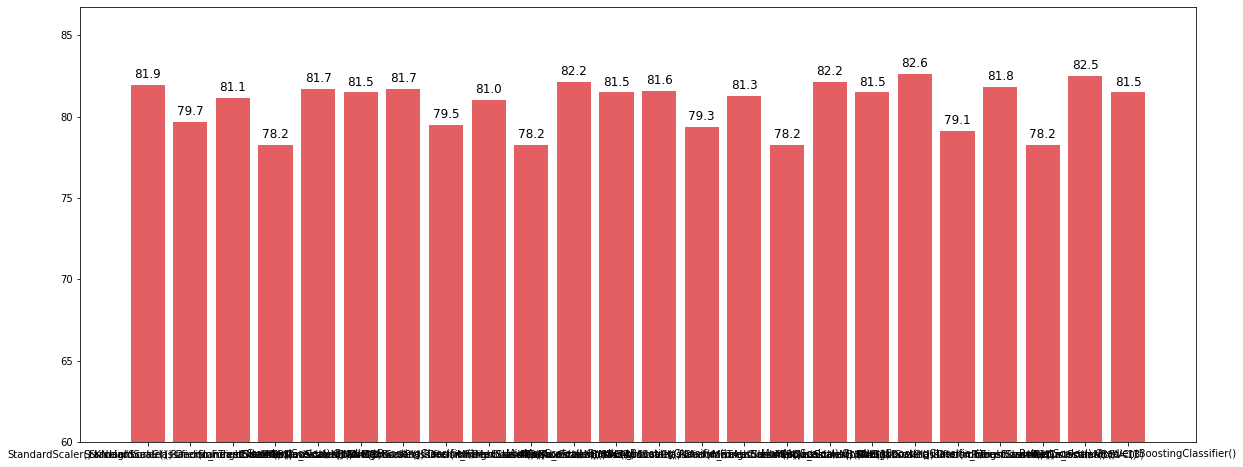

In [73]:
plt.figure(figsize=(20,8))
x = score_name
y = score_list
for i in range(len(x)):
    height = y[i]
    plt.text(x[i], height + 0.25, '%.1f' %height, ha='center', va='bottom', size = 12)
plt.bar(x, y,color='#e35f62')
plt.ylim(60,)

Checking  out what types of method get the score higher than 80?

score  type                                                    
81.03  MinMaxScaler():RandomForestClassifier(n_estimators=13)      1
81.14  StandardScaler():RandomForestClassifier(n_estimators=13)    1
81.26  MaxAbsScaler():RandomForestClassifier(n_estimators=13)      1
81.48  MaxAbsScaler():GradientBoostingClassifier()                 1
       MinMaxScaler():GradientBoostingClassifier()                 1
       RobustScaler():GradientBoostingClassifier()                 1
       StandardScaler():GradientBoostingClassifier()               1
81.59  MaxAbsScaler():KNeighborsClassifier(n_neighbors=13)         1
81.71  MinMaxScaler():KNeighborsClassifier(n_neighbors=13)         1
       StandardScaler():SVC()                                      1
81.82  RobustScaler():RandomForestClassifier(n_estimators=13)      1
81.93  StandardScaler():KNeighborsClassifier(n_neighbors=13)       1
82.15  MaxAbsScaler():SVC()                                        1
       MinMaxScaler():SVC()            

(80.0, 83.0)

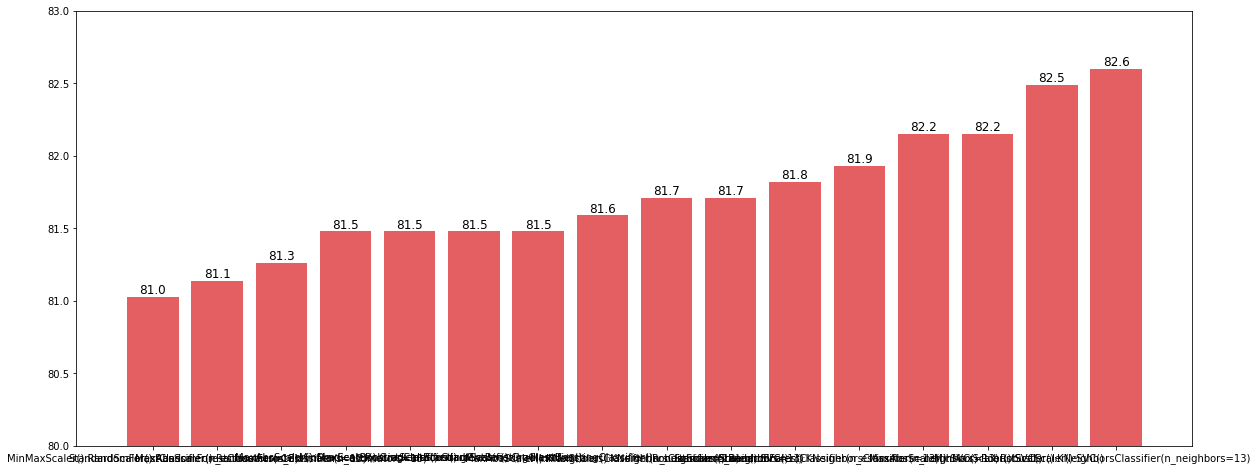

In [74]:
ma_result = pd.DataFrame()
ma_result.insert(0,"type",x)
ma_result.insert(0,"score",y)
# ma_result[ma_result["score"] >= 80].value_counts().index
ma_res_score = []
ma_res_name = []

for i in range(len(ma_result[ma_result["score"] >= 80].value_counts().index)):
    ma_res_score.append(ma_result[ma_result["score"] >= 80].value_counts().index[i][0])
    ma_res_name.append(ma_result[ma_result["score"] >= 80].value_counts().index[i][1])
print(ma_result[ma_result["score"] >= 80].value_counts())
x = ma_res_name
y = ma_res_score
plt.figure(figsize=(20,8))
for i in range(len(x)):
    height = y[i]
    plt.text(x[i], height, '%.1f' %height, ha='center', va='bottom', size = 12)

plt.bar(ma_res_name,ma_res_score,color='#e35f62')
plt.ylim(80,83)

The score of the machine learning model SVC, which was scaled using the robust scaler model, recorded the highest score with 82.60.
So I choose this way in machine learning.

In [75]:
train_data = train_df.drop("Survived", axis = 1)
target = train_df["Survived"]

train_data.fillna(0)
pd.DataFrame(train_data.isnull().value_counts())
a = pd.DataFrame(train_data["Title"]).fillna(0)
a.isnull().value_counts()
train_data["Title"] = a["Title"]
train_data

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0.0,0.4
1,1,1,3.0,4.0,0.8,1,2.0,0.4
2,3,1,1.0,0.0,2.0,0,1.0,0.0
3,1,1,2.0,4.0,0.8,0,2.0,0.4
4,3,0,2.0,0.0,2.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...
886,2,0,2.0,1.0,1.8,0,3.0,0.0
887,1,1,1.0,3.0,0.4,0,1.0,0.0
888,3,1,2.0,2.0,2.0,0,1.0,1.2
889,1,0,1.0,3.0,0.8,1,0.0,0.0


In [76]:
scl = RobustScaler()
scl.fit(train_data)
scl.transform(train_data)
scl.transform(test_data)

clf = SVC()
clf.fit(train_data, target)
# drop unnecessary column
test_data = test_df.drop("PassengerId", axis = 1).copy()
prediction = clf.predict(test_data)
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring = scoring)
score = round(np.mean(score)*100,2)
print("score: ",score)
print("prediction: ",prediction)

score:  82.6
prediction:  [0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but RobustScaler was fitted with feature names



## Using Deep learning to  Predict Result

In [77]:
import tensorflow as tf

In [78]:
train_data

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0.0,0.4
1,1,1,3.0,4.0,0.8,1,2.0,0.4
2,3,1,1.0,0.0,2.0,0,1.0,0.0
3,1,1,2.0,4.0,0.8,0,2.0,0.4
4,3,0,2.0,0.0,2.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...
886,2,0,2.0,1.0,1.8,0,3.0,0.0
887,1,1,1.0,3.0,0.4,0,1.0,0.0
888,3,1,2.0,2.0,2.0,0,1.0,1.2
889,1,0,1.0,3.0,0.8,1,0.0,0.0


In [79]:
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [80]:
import tensorflow as tf

model = tf.keras.models.Sequential(
[
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])# if the layer nuber get too high numb, it can be lead model's overfitting.

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.fit(np.array(train_data), np.array(target), epochs=150, verbose=0)


In [81]:
submission_dl = []

In [86]:
for i in range(len(model.predict(test_data))):
    if model.predict(test_data)[i][0] >= 0.8:
        submission_dl.append(1)
    else:
        submission_dl.append(0)
# print(submission_dl)

14/14 [==============================] - 0s 2ms/step


In [87]:
prediction_dl = np.array(submission_dl)
prediction_dl

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

## Submission

In [84]:
submission = pd.DataFrame({
    "PassengerId":test_df["PassengerId"],
    "Survived":prediction
    
})

submission.to_csv("submission_ma.csv",index=False)

In [85]:
submission = pd.read_csv("submission_ma.csv")
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
